# Selection sort

In [ ]:
def selection_sort(A):
    i, N = 0, len(A)
    while (i < N): # 0, 1, ..., N-1
        # find the min in [i, N]
        min_idx = i
        j = i + 1
        while j < N: # i+1, i+2, ..., N-1
            if A[j] < A[min_idx]:
                min_idx = j
            j = j + 1
        # swap it with A[i]
        A_i, A_min_idx = A[i], A[min_idx]
        A[i] = A_min_idx
        A[min_idx] = A_i
        i = i + 1
    return A

# Empirical testing
selection_sort([5, 2, 8, 1, 0, 1000, 10])


[0, 1, 2, 5, 8, 10, 1000]

# Runtime plots

/var/folders/wt/l509j2v13614w84pwcgyhw9w0000gp/T/ipykernel_49749/3667965143.py:48: RuntimeWarning: divide by zero encountered in log2
  n, 6*n*np.log2(n) + 6*n,
/var/folders/wt/l509j2v13614w84pwcgyhw9w0000gp/T/ipykernel_49749/3667965143.py:48: RuntimeWarning: invalid value encountered in multiply
  n, 6*n*np.log2(n) + 6*n,


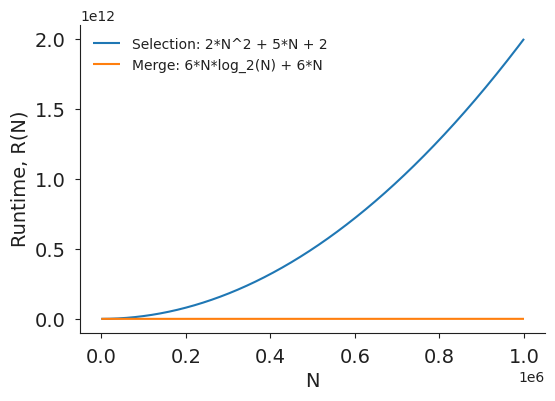

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from plot_utils import set_title_axes_labels, fig_setup, finalize

fig, axs = fig_setup(1,1)
n = np.arange(0, 1000000)
ms = 5
# _=axs[0].plot(  
#     n, 100*n**2, # n^2
#     ms=ms,
#     label="100*N^2"
# )
# _=axs[0].plot(  
#     n, n**2, # n^2
#     ms=ms,
#     label="N^2"
# )
# _=axs[0].plot(  
#     n, 1000*n*np.log2(n),
#     ms=ms,
#     label="1000*N*log_2(N)"
# )
# _=axs[0].plot(  
#     n, n, # n
#     ms=ms,
#     label="N"
# )
# _=axs[0].plot(  
#     n, 100000*n + 1000*n*np.log2(n),
#     ms=ms,
#     label="1000*N*log_2(N) + 100000*N"
# )
# _=axs[0].plot(  
#     n, 100000*n,
#     ms=ms,
#     label="100000*N"
# )
# _=axs[0].plot(  
#     n, n*np.log2(n),
#     ms=ms,
#     label="N*log_2 N"
# )
_=axs[0].plot(  
    n, 2*(n**2) + 5*n + 2,
    label="Selection: 2*N^2 + 5*N + 2"
)
_=axs[0].plot(  
    n, 6*n*np.log2(n) + 6*n,
    label="Merge: 6*N*log_2(N) + 6*N"
)
_=axs[0].legend(loc='upper left')
set_title_axes_labels(axs[0], xlabel="N", ylabel="Runtime, R(N)")
finalize(axs)
plt.show()

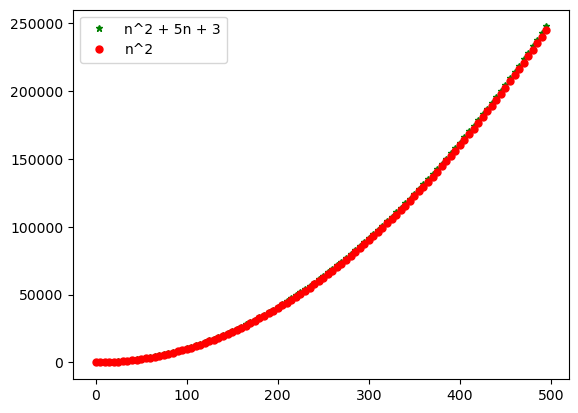

In [ ]:
fig, axs = plt.subplots()
n = np.arange(0, 500, 5)
ms = 5
_=axs.plot(  
    n, n**2 + 5*n + 3,
    'g*',
    ms=ms,
    label="n^2 + 5n + 3"
)
_=axs.plot(  
    n, n**2, # n^2
    'ro',
    ms=ms,
    label="n^2"
)
_=axs.legend(loc='upper left')
plt.show()

## Insertion sort

In [22]:
def insertion_sort(A):
    i, N = 1, len(A)
    while i < N:
        j = i
        while j > 0 and (A[j] < A[j-1]):
            # swap A[j] <-> A[j-1]
            A_j, A_jminus1 = A[j], A[j-1]
            A[j-1], A[j] = A_j, A_jminus1
            j = j - 1
        i = i + 1
    return A

insertion_sort([6, 5, 3, 1, 8, 7, 4])

[1, 3, 4, 5, 6, 7, 8]

## Recursion

Recursive behavior can be defined by two properties:

- A simple base case (or cases) — a terminating scenario that does not use recursion to produce an answer
- A recursive step — a set of rules that reduces all successive cases toward the base case.

### Fibonacci sequence

- Base case: $F(0) = 0, F(1) = 1$
- Recursive case: $F(n) = F(n-1) + F(n-2)$ for $n \geq 2$

In [27]:
def fibonacci(n):
    if n==0:
        return 0
    elif n==1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)
    
[fibonacci(n) for n in range(2, 9)]

[1, 2, 3, 5, 8, 13, 21]

### n = 2

Go to line 7 and `fibonacci(1) + fibonacci(0) = 1 + 0 = 1`

### n = 3

Go to line 7 and `fibonacci(2) + fibonacci(1) = 1 + 1 = 2`

### n = 4

Go to line 7 and `fibonacci(3) + fibonacci(2) = 2 + 1 = 3`




## MergeSort

In [44]:
def merge(A, B):
    # A and B are assumed to be sorted arrays
    i, j = 0, 0
    output = []
    # Merge elements from both halves in sorted order
    while (i < len(A)) and (j < len(B)):
        if A[i] < B[j]:
            output.append(A[i])
            # A[i] was smallest.
            # So now we want to compare A[i+1] to B[j]
            i = i + 1
        else: # B[j] < A[i]
            output.append(B[j])
            # B[j] was smallest.
            # So now we want to compare A[i] to B[j+1]
            j = j + 1
    
    # Append any remaining elements from both halves
    while (i < len(A)):
        output.append(A[i])
        i = i + 1
    while (j < len(B)):
        output.append(B[j])
        j = j + 1

    return output
    
merge([1,3],[2,4])

[1, 2, 3, 4]

[2, 3, 5, 8]

In [ ]:
def merge_sort(A):
    # Base case: if array has 0 or 1 element, 
    # it's already sorted
    if len(A) <= 1:
        return A
    
    # Divide array into two halves
    mid = int(len(A)/2)
    left_half, right_half = A[:mid], A[mid:]
    
    # Recursively sort each half
    left_sorted = merge_sort(left_half)
    right_sorted = merge_sort(right_half)

    # Merge the sorted halves
    return merge(left_sorted, right_sorted)


merge_sort([5, 2, 8, 3])

# Binary search

In [ ]:
def binary_search(array, query_val, low, high):
    if high >= low:
        # Mid point
        mid = low + ((high - low) // 2) # "//" is floor division operator

        # If found at mid, then return it
        if query_val == array[mid]:
            return mid

        # Search the right half
        elif query_val > array[mid]:
            return binary_search(array, query_val, mid + 1, high)

        # Search the left half
        else:
            return binary_search(array, query_val, low, mid - 1)

    else:
        return -1


array = [3, 4, 5, 6, 7, 8, 9]
binary_search(array, 4, 0, len(array)-1)
binary_search(array, 1, 0, len(array)-1)

1

-1

# Linked lists

In [17]:
# Test for non-empty list
l = LinkedList()
l.insert_node_at_beginning(new_data="data 1")
l.insert_node_at_beginning(new_data="data 2")

l.head.data
l.head.next.data

'data 2'

'data 1'

# Stack

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class Stack:
    def __init__(self):
        self.head = None
    
    def push(self, new_data):
        """Add node to top of stack"""
        # Create new node
        new_node = Node(data=new_data)
        # Point new node to what used to be HEAD
        new_node.next = self.head
        # Set stack's HEAD to be new node
        self.head = new_node

    def pop(self):
        """Remove node from top of stack and return removed node"""
        # If stack is non-empty, set stack's head to be 
        # the node that the HEAD node points to
        head_node = self.head
        if self.head is not None:
            self.head = self.head.next
        return head_node

    def peek(self):
        """Get value of the HEAD node"""
        data = None
        if self.head is not None:
            data = self.head.data
        return data
    
    def size(self):
        """Get number of nodes in the stack"""
        num_nodes = 0
        curr_node = self.head
        while curr_node is not None:
            num_nodes += 1
            curr_node = curr_node.next
        return num_nodes

    def is_empty(self):
        """Determine if stack is empty"""
        if self.head is None:
            return True
        return False


s = Stack()
print(f"Is stack empty? {s.is_empty()}")
s.push(new_data=1)
print(f"Top node's data: {s.peek()}")
s.push(new_data=2)
print(f"Top node's data: {s.peek()}")
print(f"Stack size: {s.size()}")
print(f"Is stack empty? {s.is_empty()}")
print(f"Removed data: {s.pop().data}")
print(f"Removed data: {s.pop().data}")
print(f"Is stack empty? {s.is_empty()}")


Is stack empty? True
Top node's data: 1
Top node's data: 2
Stack size: 2
Is stack empty? False
Removed data: 2
Removed data: 1
Is stack empty? True


In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class Queue:
    def __init__(self):
        self.front = None
        self.rear = None

    def enqueue(self, new_data):
        """Add node to end of queue"""
        pass

    def dequeue(self):
        """Remove node to front of queue and return removed node"""
        pass

    def peek(self):
        """Remove node to front of queue and return removed node"""
        pass

    def size(self):
        """Get number of nodes in queue"""
        pass

    def is_empty(self):
        """Determine if queue is empty"""
        pass